In [3]:
# import libraries

import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sy
from sklearn.preprocessing import OneHotEncoder
from sklearn import neighbors

from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)

In [4]:
# read train_data files
train_data_2016 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/Zillowdata2016.csv")
# read train_data file
train_data_2017 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/Zillowdata2017.csv")

In [10]:
# check missing values
train_data_2017[train_data_2016.isnull().any(axis=1)]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,logerror,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet15,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxdelinquencyflag,taxpercentage,transaction_quarter


In [11]:
# split the dependent and indepandent variables
X = train_data_2017.drop('logerror',axis = 1)
y = train_data_2017['logerror'].values.astype(np.float64)


# Fit a linear model and predict on test variable
lm= LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.70,random_state=100)

lm.fit(x_train,y_train)
prd=lm.predict(x_test)



In [12]:
# performance metrics
from sklearn import metrics
print("MAE--->",metrics.mean_absolute_error(y_test,prd))
print("MSE--->",metrics.mean_squared_error(y_test,prd))
print("RMSE--->",np.sqrt(metrics.mean_squared_error(y_test,prd)))
print("R^2--->", lm.score(x_test,y_test))

MAE---> 0.07115061953128127
MSE---> 0.028489950257932672
RMSE---> 0.16878966276976998
R^2---> 0.9999999925682778


In [13]:
lm.coef_

array([ 9.29888834e-05,  9.53821948e-05, -2.19496966e-02, -4.36323370e-04,
       -4.28635155e-03,  2.08254942e-02,  3.22415509e-03,  4.39643592e-06,
        4.39638031e-06,  8.25182749e-06,  8.18652941e-05, -3.01585800e-03,
        3.97503526e-03,  1.51552639e-05, -3.42198824e-02, -1.17268240e-04,
       -4.31818892e-09,  3.59408362e-09,  3.00001387e-08,  3.86904696e-01,
       -5.77092638e-05, -3.66607011e-01, -3.64808597e-01,  1.13176580e-03,
        3.22415554e-09,  5.11302274e-06,  8.86334773e-08,  1.79666566e-03,
       -2.63221532e-06, -1.44394952e-05, -1.70026646e-05,  6.94470523e-05,
       -1.09554619e-03, -1.43270022e-02,  8.47338051e-08, -1.02059334e-07,
        1.13742961e+00,  9.54572529e-08,  9.40018051e-03,  2.69458513e-01,
        3.21361486e-03])

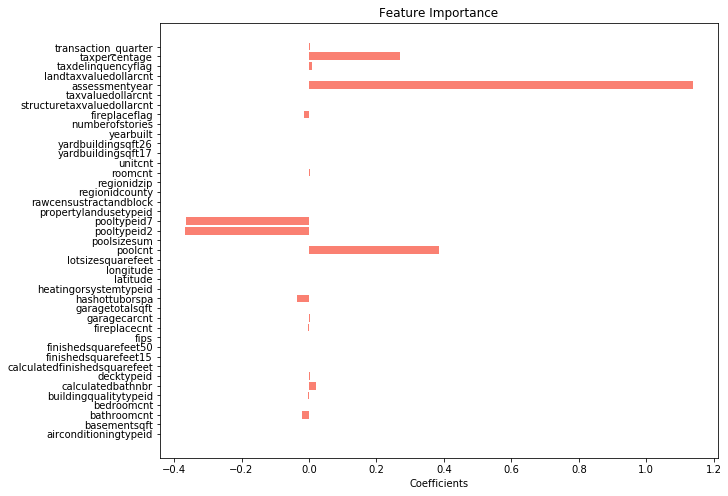

In [14]:
#Feature Importance
variables = X.columns
coefficients = lm.coef_
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.barh(variables,coefficients,color='salmon')
ax.set_xlabel("Coefficients")
ax.set_title("Feature Importance")
plt.show()